In [1]:
# Bibliotecas principais
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Exemplo de modelo, podemos ajustar depois
from sklearn.preprocessing import LabelEncoder

# Exibição
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

url = 'https://raw.githubusercontent.com/danielaschuck/SmartKitchen/main/receitas_saudaveis.csv'
df = pd.read_csv(url)

df.head()

,Nome da Receita,Ingredientes,Tempo de Preparo (min),Calorias (kcal),Tipo de Refeição,Preferência Dietética,Objetivo
0,Omelete de claras com espinafre,"Claras de ovo, espinafre, cebola",10,150,Café da manhã,Proteico,Ganho de massa
1,Panqueca de banana fit,"Banana, ovo, aveia",10,220,Café da manhã,Proteico,Ganho de massa
2,Smoothie de morango com proteína,"Morango, iogurte natural, whey protein",5,200,Café da manhã,Proteico,Ganho de massa
3,Salada de quinoa com grão-de-bico,"Quinoa, grão-de-bico, tomate, pepino",20,320,Almoço,Vegano,Manutenção
4,Frango grelhado com batata-doce,"Peito de frango, batata-doce, azeite",30,450,Almoço,Low carb,Ganho de massa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Nome da Receita         21 non-null     object
 1   Ingredientes            21 non-null     object
 2   Tempo de Preparo (min)  21 non-null     int64 
 3   Calorias (kcal)         21 non-null     int64 
 4   Tipo de Refeição        21 non-null     object
 5   Preferência Dietética   21 non-null     object
 6   Objetivo                21 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.3+ KB
['Café da manhã' 'Almoço' 'Jantar' 'Lanche' 'Sobremesa']
['Proteico' 'Vegano' 'Low carb']
['Ganho de massa' 'Manutenção' 'Perda de peso']


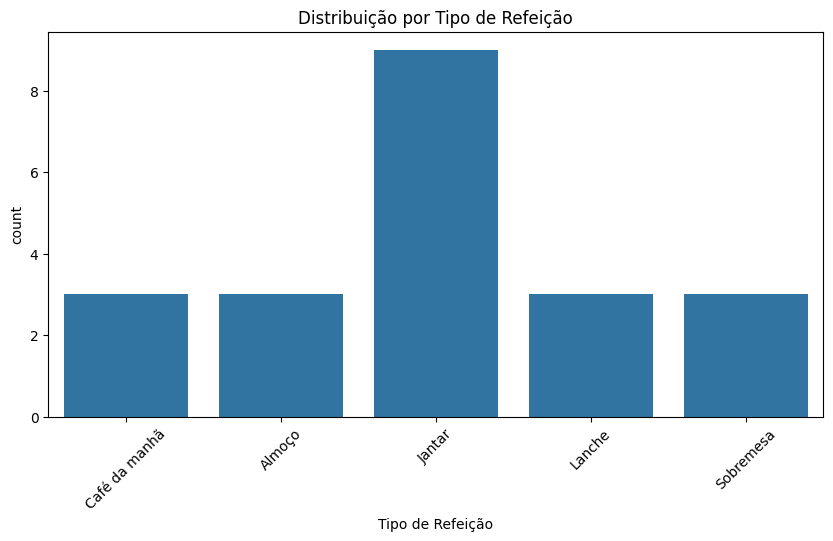

In [2]:
# Informações gerais
df.info()

# Verificar valores únicos em colunas importantes
print(df['Tipo de Refeição'].unique())
print(df['Preferência Dietética'].unique())
print(df['Objetivo'].unique())

# Gráficos para visualizar a distribuição
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Tipo de Refeição')
plt.xticks(rotation=45)
plt.title('Distribuição por Tipo de Refeição')
plt.show()


In [3]:
# Transformar a coluna de Ingredientes em listas
df['Ingredientes'] = df['Ingredientes'].apply(lambda x: [item.strip().lower() for item in x.split(',')])


In [4]:
def buscar_receitas_por_ingrediente(ingrediente):
    ingrediente = ingrediente.lower()
    receitas = df[df['Ingredientes'].apply(lambda x: ingrediente in x)]
    return receitas[['Nome da Receita', 'Ingredientes']]

# Exemplo de uso:
ingrediente_usuario = 'frango'
resultado = buscar_receitas_por_ingrediente(ingrediente_usuario)
print(resultado)


         Nome da Receita                       Ingredientes
17  Caldo de frango leve  [frango, cenoura, batata, cebola]


In [5]:
def buscar_receitas(ingredientes_usuario=None, tipo_refeicao=None, objetivo=None):
    """
    ingredientes_usuario: lista de ingredientes que o usuário tem (ex: ['frango', 'arroz']) ou None
    tipo_refeicao: tipo de refeição desejada (ex: 'Almoço', 'Jantar', 'Sobremesa') ou None
    objetivo: objetivo do usuário (ex: 'Ganho de Massa', 'Saudável') ou None
    """

    receitas_filtradas = df.copy()

    # Se o usuário informou ingredientes, filtramos
    if ingredientes_usuario:
        ingredientes_usuario = [i.lower() for i in ingredientes_usuario]
        receitas_filtradas = receitas_filtradas[receitas_filtradas['Ingredientes'].apply(
            lambda receita: all(ingrediente in receita for ingrediente in ingredientes_usuario)
        )]

    # Se o usuário informou tipo de refeição, filtramos
    if tipo_refeicao:
        receitas_filtradas = receitas_filtradas[receitas_filtradas['Tipo de Refeição'].str.lower() == tipo_refeicao.lower()]

    # Se o usuário informou objetivo, filtramos
    if objetivo:
        receitas_filtradas = receitas_filtradas[receitas_filtradas['Objetivo'].str.lower() == objetivo.lower()]

    # Se não encontrar nada, podemos dar uma resposta amigável (opcional)
    if receitas_filtradas.empty:
        print("Nenhuma receita encontrada com os critérios informados 😕.")
        return None
    else:
        return receitas_filtradas[['Nome da Receita', 'Ingredientes', 'Tipo de Refeição', 'Objetivo']]

In [7]:
# Exemplo 1: o usuário tem frango e quer ganhar massa no almoço
ingredientes = ['frango']
tipo_refeicao = 'Janta'
objetivo = 'Ganho de Massa'

resultados = buscar_receitas(ingredientes_usuario=ingredientes, tipo_refeicao=tipo_refeicao, objetivo=objetivo)
print(resultados)


Nenhuma receita encontrada com os critérios informados 😕.
None


In [9]:
# 1. Perguntar se o usuário quer buscar por ingredientes
quer_ingredientes = input("Você quer buscar receitas com base nos ingredientes que você tem? (sim/não): ").strip().lower()

ingredientes_usuario = None
if quer_ingredientes == 'sim':
    ingredientes_usuario = input("Digite os ingredientes separados por vírgula: ").lower().split(',')

# 2. Perguntar tipo de refeição
tipo_refeicao = input("Qual tipo de refeição você quer? (Almoço, Jantar, Sobremesa) (ou aperte Enter para pular): ").strip()
tipo_refeicao = tipo_refeicao if tipo_refeicao else None

# 3. Perguntar objetivo
objetivo = input("Qual é seu objetivo? (Saudável, Ganho de Massa, etc) (ou aperte Enter para pular): ").strip()
objetivo = objetivo if objetivo else None

# 4. Buscar receitas com base nas respostas
receitas_encontradas = buscar_receitas(ingredientes_usuario=ingredientes_usuario, tipo_refeicao=tipo_refeicao, objetivo=objetivo)

# 5. Exibir resultados
if receitas_encontradas is not None:
    print("\nReceitas encontradas para você:")
    print(receitas_encontradas.to_string(index=False))
else:
    print("\nTente mudar os filtros para encontrar mais receitas!")


Você quer buscar receitas com base nos ingredientes que você tem? (sim/não): Não
Qual tipo de refeição você quer? (Almoço, Jantar, Sobremesa) (ou aperte Enter para pular): Sobremesa
Qual é seu objetivo? (Saudável, Ganho de Massa, etc) (ou aperte Enter para pular): 

Receitas encontradas para você:
            Nome da Receita                               Ingredientes Tipo de Refeição       Objetivo
Mousse de cacau com abacate                [abacate, cacau em pó, mel]        Sobremesa  Perda de peso
     Brigadeiro fit de whey [whey protein, leite de coco, cacau em pó]        Sobremesa Ganho de massa
Sorvete de banana congelada            [banana congelada, cacau em pó]        Sobremesa  Perda de peso


In [10]:
# Dicionário de categorias
categorias_ingredientes = {
    'proteinas': ['frango', 'peixe', 'carne moída', 'tofu', 'feijão', 'lentilha', 'ovos'],
    'carboidratos': ['arroz integral', 'batata', 'batata-doce', 'quinoa', 'macarrão integral'],
    'verduras': ['brócolis', 'cenoura', 'abobrinha', 'espinafre', 'couve'],
    'frutas': ['banana', 'maçã', 'morango', 'melancia', 'manga'],
    'gorduras': ['abacate', 'azeite', 'nozes', 'amêndoas', 'óleo de coco'],
    'laticinios': ['queijo', 'iogurte', 'leite'],
    'graos': ['aveia', 'grão-de-bico', 'lentilhas'],
    'temperos': ['alho', 'cebola', 'pimenta', 'limão', 'ervas secas'],
    'veganos': ['tofu', 'leite vegetal', 'seitan']
}

# Função para categorizar os ingredientes
def categorizar_ingredientes(ingredientes):
    categorias = {'proteinas': [], 'carboidratos': [], 'verduras': [], 'frutas': [], 'gorduras': [],
                  'laticinios': [], 'graos': [], 'temperos': [], 'veganos': []}

    # Itera sobre os ingredientes e categoriza
    for ingrediente in ingredientes:
        for categoria, lista_ingredientes in categorias_ingredientes.items():
            if ingrediente.lower() in lista_ingredientes:
                categorias[categoria].append(ingrediente)

    return categorias

# Exemplo de uso:
ingredientes_exemplo = ['frango', 'arroz integral', 'brócolis', 'azeite', 'banana']
categorias = categorizar_ingredientes(ingredientes_exemplo)
print(categorias)


{'proteinas': ['frango'], 'carboidratos': ['arroz integral'], 'verduras': ['brócolis'], 'frutas': ['banana'], 'gorduras': ['azeite'], 'laticinios': [], 'graos': [], 'temperos': [], 'veganos': []}


In [11]:
# Transformar a coluna 'Ingredientes' de lista para string única
df['Ingredientes'] = df['Ingredientes'].apply(lambda x: ' '.join(x))

# Verificando o DataFrame após a transformação
print(df[['Nome da Receita', 'Ingredientes']])

                      Nome da Receita  \
0     Omelete de claras com espinafre   
1              Panqueca de banana fit   
2    Smoothie de morango com proteína   
3   Salada de quinoa com grão-de-bico   
4     Frango grelhado com batata-doce   
5         Salmão ao forno com legumes   
6               Sopa de legumes detox   
7     Sopa de frango com mandioquinha   
8        Sopa de abóbora com gengibre   
9                    Mix de castanhas   
10          Iogurte com chia e frutas   
11    Barrinha caseira de aveia e mel   
12        Mousse de cacau com abacate   
13             Brigadeiro fit de whey   
14        Sorvete de banana congelada   
15              Sopa de ervilha fácil   
16            Sopa de lentilha rápida   
17               Caldo de frango leve   
18         Sopa de couve-flor cremosa   
19          Sopa de abobrinha express   
20               Caldo verde saudável   

                                  Ingredientes  
0               claras de ovo espinafre cebola  

In [13]:

# Dicionário de categorias para os ingredientes
categorias = {
    'frango': 'Proteína',
    'salmão': 'Proteína',
    'ovos': 'Proteína',
    'iogurte': 'Proteína',
    'banana': 'Fruta',
    'morango': 'Fruta',
    'cenoura': 'Vegetal',
    'abobrinha': 'Vegetal',
    'batata-doce': 'Carboidrato',
    'quinoa': 'Carboidrato',
    'grão-de-bico': 'Carboidrato',
    'aveia': 'Carboidrato',
    'cacau': 'Outros',
    'mel': 'Outros',
    'chia': 'Outros'
}
# Função para categorizar os ingredientes
def categorizar_ingredientes(ingredientes):
    categorias_ingredientes = []
    for ingrediente in ingredientes.split():
        if ingrediente in categorias:
            categorias_ingredientes.append(categorias[ingrediente])
        else:
            categorias_ingredientes.append('Outros')  # Categoria padrão para ingredientes não categorizados
    return categorias_ingredientes

# Aplicando a função no DataFrame
df['Categorias'] = df['Ingredientes'].apply(categorizar_ingredientes)

# Verificando as mudanças no DataFrame
print(df[['Nome da Receita', 'Ingredientes', 'Categorias']])

                      Nome da Receita  \
0     Omelete de claras com espinafre   
1              Panqueca de banana fit   
2    Smoothie de morango com proteína   
3   Salada de quinoa com grão-de-bico   
4     Frango grelhado com batata-doce   
5         Salmão ao forno com legumes   
6               Sopa de legumes detox   
7     Sopa de frango com mandioquinha   
8        Sopa de abóbora com gengibre   
9                    Mix de castanhas   
10          Iogurte com chia e frutas   
11    Barrinha caseira de aveia e mel   
12        Mousse de cacau com abacate   
13             Brigadeiro fit de whey   
14        Sorvete de banana congelada   
15              Sopa de ervilha fácil   
16            Sopa de lentilha rápida   
17               Caldo de frango leve   
18         Sopa de couve-flor cremosa   
19          Sopa de abobrinha express   
20               Caldo verde saudável   

                                  Ingredientes  \
0               claras de ovo espinafre cebola 

In [15]:
from collections import Counter
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Carregar SEUS dados
url = 'https://raw.githubusercontent.com/danielaschuck/SmartKitchen/main/receitas_saudaveis.csv'
df = pd.read_csv(url)

# Converter ingredientes para listas e minúsculas
df['Ingredientes'] = df['Ingredientes'].apply(lambda x: [item.strip().lower() for item in x.split(',')])

# Contar a frequência de cada ingrediente
ingredient_counts = Counter()
for ingredients in df['Ingredientes']:
    ingredient_counts.update(ingredients)

# Obter os 20 ingredientes mais comuns
top_ingredients = [item[0] for item in ingredient_counts.most_common(20)]
print("Os 20 ingredientes mais comuns:", top_ingredients)

# Criar representação binária dos ingredientes
def represent_ingredients(ingredients):
    representation = [1 if ingredient in ingredients else 0 for ingredient in top_ingredients]
    return representation

df['Ingredient_Vector'] = df['Ingredientes'].apply(represent_ingredients)
print("\nRepresentação dos ingredientes:")
print(df[['Nome da Receita', 'Ingredientes', 'Ingredient_Vector']].head())

# Passo 2: Codificar Variáveis Categóricas
encoder_tipo = LabelEncoder()
df['Tipo_Encoded'] = encoder_tipo.fit_transform(df['Tipo de Refeição'])
encoder_preferencia = LabelEncoder()
df['Preferencia_Encoded'] = encoder_preferencia.fit_transform(df['Preferência Dietética'])
encoder_objetivo = LabelEncoder()
df['Objetivo_Encoded'] = encoder_objetivo.fit_transform(df['Objetivo'])

tipo_one_hot = pd.get_dummies(df['Tipo de Refeição'], prefix='Tipo')
preferencia_one_hot = pd.get_dummies(df['Preferência Dietética'], prefix='Preferencia')
objetivo_one_hot = pd.get_dummies(df['Objetivo'], prefix='Objetivo')

df = pd.concat([df, tipo_one_hot, preferencia_one_hot, objetivo_one_hot], axis=1)

# Passo 3: Normalizar Variáveis Numéricas
scaler_tempo = MinMaxScaler()
df['Tempo_Normalizado'] = scaler_tempo.fit_transform(df[['Tempo de Preparo (min)']])
scaler_calorias = MinMaxScaler()
df['Calorias_Normalizadas'] = scaler_calorias.fit_transform(df[['Calorias (kcal)']])

# Passo 4: Criar Target para "Perda de Peso" (Regras Heurísticas)
df['Target_Perda_Peso'] = df.apply(lambda row: 1 if (row['Calorias (kcal)'] < 400 or 'perda de peso' in row['Objetivo'].lower()) else 0, axis=1)
print("\nTarget para Perda de Peso:")
print(df[['Nome da Receita', 'Calorias (kcal)', 'Objetivo', 'Target_Perda_Peso']].head())

# Preparar os dados para a rede neural
X = pd.concat([
    df['Ingredient_Vector'].apply(pd.Series),
    df[['Tempo_Normalizado', 'Calorias_Normalizadas']],
    df[[col for col in df.columns if col.startswith('Tipo_')]],
    df[[col for col in df.columns if col.startswith('Preferencia_')]],
    df[[col for col in df.columns if col.startswith('Objetivo_')]]
], axis=1)
y = df['Target_Perda_Peso']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 5: Construir e Treinar a Rede Neural (Usando Keras/TensorFlow)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Saída para classificação binária (relevante ou não)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=4, validation_data=(X_test, y_test))

# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nLoss no teste: {loss:.4f}")
print(f"Acurácia no teste: {accuracy:.4f}")


# O próximo passo seria integrar isso na sua função de recomendação para novos usuários.


Os 20 ingredientes mais comuns: ['cebola', 'cenoura', 'azeite', 'abobrinha', 'cacau em pó', 'alho', 'banana', 'aveia', 'morango', 'iogurte natural', 'whey protein', 'batata-doce', 'mel', 'claras de ovo', 'espinafre', 'ovo', 'quinoa', 'grão-de-bico', 'tomate', 'pepino']

Representação dos ingredientes:
                     Nome da Receita  \
0    Omelete de claras com espinafre   
1             Panqueca de banana fit   
2   Smoothie de morango com proteína   
3  Salada de quinoa com grão-de-bico   
4    Frango grelhado com batata-doce   

                               Ingredientes  \
0        [claras de ovo, espinafre, cebola]   
1                      [banana, ovo, aveia]   
2  [morango, iogurte natural, whey protein]   
3    [quinoa, grão-de-bico, tomate, pepino]   
4    [peito de frango, batata-doce, azeite]   

                                   Ingredient_Vector  
0  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...  
1  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...  
2  [0, 0

In [17]:
# Ingredientes desejados
novo_ingredientes = ['banana', 'aveia']

# Ingredientes binários
novo_ingredient_vector = [1 if ingrediente in novo_ingredientes else 0 for ingrediente in top_ingredients]

# Valores padrões para tempo e calorias (0.5 é "meio termo")
tempo_normalizado = 0.5
calorias_normalizadas = 0.5

# One-hot padrão para tipo de refeição
tipo_cols = [0] * len([col for col in df.columns if col.startswith('Tipo_')])
preferencia_cols = [0] * len([col for col in df.columns if col.startswith('Preferencia_')])
objetivo_cols = [0] * len([col for col in df.columns if col.startswith('Objetivo_')])

# Juntando tudo
X_novo = pd.DataFrame([novo_ingredient_vector + [tempo_normalizado, calorias_normalizadas] + tipo_cols + preferencia_cols + objetivo_cols])

# Previsão
probabilidade = model.predict(X_novo)

print(f"Probabilidade de ser boa para perda de peso: {probabilidade[0][0]:.2f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Probabilidade de ser boa para perda de peso: 0.77
